In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
tem=pd.read_csv('/content/drive/My Drive/파예측(전국10년)/data/statisticsDivision_20200416134357_기온,강수.csv',encoding='euc-kr',sep='\n')
wind=pd.read_csv('/content/drive/My Drive/파예측(전국10년)/data/statisticsDivision_20200416134346_바람.csv',encoding='euc-kr',sep='\n')
atm=pd.read_csv('/content/drive/My Drive/파예측(전국10년)/data/statisticsDivision_20200416134321_기압.csv',encoding='euc-kr',sep='\n')
wet=pd.read_csv('/content/drive/My Drive/파예측(전국10년)/data/statisticsDivision_20200416134311_습도.csv',encoding='euc-kr',sep='\n')
sol=pd.read_csv('/content/drive/My Drive/파예측(전국10년)/data/statisticsDivision_20200416133628일사,일조.csv',encoding='euc-kr',sep='\n')

In [0]:
tem=pd.read_csv('/content/drive/My Drive/파예측(전국10년)/data/statisticsDivision_20200416134357_기온,강수.csv',encoding='euc-kr',sep=',',skiprows=9)

In [0]:
wind=pd.read_csv('/content/drive/My Drive/파예측(전국10년)/data/statisticsDivision_20200416134346_바람.csv',encoding='euc-kr',sep=',',skiprows=10)

In [0]:
atm=pd.read_csv('/content/drive/My Drive/파예측(전국10년)/data/statisticsDivision_20200416134321_기압.csv',encoding='euc-kr',sep=',',skiprows=11)


In [0]:
wet=pd.read_csv('/content/drive/My Drive/파예측(전국10년)/data/statisticsDivision_20200416134311_습도.csv',encoding='euc-kr',sep=',',skiprows=12)

In [0]:
sol=pd.read_csv('/content/drive/My Drive/파예측(전국10년)/data/statisticsDivision_20200416133628일사,일조.csv',encoding='euc-kr',sep=',',skiprows=13)

In [0]:
price_pa=pd.read_csv('/content/drive/My Drive/파예측(전국10년)/data/가격정보_pa.csv')

,구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연평균
0,2010,"2,268","2,491","2,571","2,701","3,082","3,094","2,961","2,498","4,908","5,909","4,844","4,161","3,460"
1,2011,"4,509","4,653","4,036","2,949","1,898","1,684","1,747","2,074","2,629","2,128","1,679","1,617","2,606"
2,2012,"1,797","2,303","2,086","1,737","2,233","2,956","2,759","2,978","3,924","3,859","3,335","3,425","2,783"
3,2013,"3,263","3,275","3,160","3,269","3,068","2,584","2,007","2,234","2,579","2,425","2,235","2,355","2,699"
4,2014,"2,019","2,099","2,011","1,802","1,756","1,788","1,836","2,124","2,333","2,079","1,893","2,424","2,011"


In [0]:
tem.shape

(293, 5)

In [0]:
tem=tem.drop(columns=['일시'])

In [0]:
wind.shape

(293, 3)

In [0]:
atm.shape

(293, 7)

In [0]:
atm=atm.drop(columns=['일시'])

In [0]:
wet.shape

(293, 3)

In [0]:
wet=wet.drop(columns=['일시'])

In [0]:
sol.shape

(293, 3)

In [0]:
sol=sol.drop(columns=['일시'])

In [0]:
price_pa.shape

(11, 14)

In [0]:
all_weather = pd.concat([wind, tem, atm, wet, sol],axis=1)

In [0]:
all_weather.shape

(293, 17)

In [0]:
all_weather.head()

,일시,평균풍속(m/s),최대풍속(m/s),평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm),평균현지기압(hPa),최고현지기압(hPa),최저현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),평균상대습도(%),최소상대습도(%),합계일조시간(hr),합계전천일사량(MJ/㎡)
0,1996-01,8.8,22.8,-0.9,4.8,-5.7,90.6,1024.4,NaN,NaN,1025.7,1039.6,1016.7,79.0,54,215.2,311.69
1,1996-02,10.2,22.2,-0.7,5.3,-5.9,114.2,1025.0,NaN,NaN,1026.5,1040.0,1005.6,78.0,46,229.7,393.65
2,1996-03,8.2,19.0,4.6,10.0,-0.3,264.0,1018.8,NaN,NaN,1020.4,1034.3,1000.7,78.0,44,200.6,428.12
3,1996-04,7.1,21.7,10.0,16.2,3.9,166.4,1018.1,NaN,NaN,1019.8,1034.2,1002.5,71.0,44,272.4,594.42
4,1996-05,4.9,19.8,16.8,23.3,10.8,139.0,1012.8,NaN,NaN,1014.6,1025.1,1004.5,81.0,46,290.6,618.50


In [0]:
all_weather.isnull().sum()

일시                0
평균풍속(m/s)         1
최대풍속(m/s)         0
평균기온(℃)           1
최고기온 평균(℃)        1
최저기온 평균(℃)        1
강수량(mm)           0
평균현지기압(hPa)       1
최고현지기압(hPa)      11
최저현지기압(hPa)      12
평균해면기압(hPa)       1
최고해면기압(hPa)       0
최저해면기압(hPa)       0
평균상대습도(%)         1
최소상대습도(%)         0
합계일조시간(hr)        0
합계전천일사량(MJ/㎡)     0
dtype: int64

In [0]:
all_weather=all_weather.fillna(0)

In [0]:
all_weather=all_weather.iloc[:-1,:]

In [0]:
all_weather.iloc[:,:]

,일시,평균풍속(m/s),최대풍속(m/s),평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm),평균현지기압(hPa),최고현지기압(hPa),최저현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),평균상대습도(%),최소상대습도(%),합계일조시간(hr),합계전천일사량(MJ/㎡)
0,1996-01,8.8,22.8,-0.9,4.8,-5.7,90.6,1024.4,0.0,0.0,1025.7,1039.6,1016.7,79.0,54,215.2,311.69
1,1996-02,10.2,22.2,-0.7,5.3,-5.9,114.2,1025.0,0.0,0.0,1026.5,1040.0,1005.6,78.0,46,229.7,393.65
2,1996-03,8.2,19.0,4.6,10.0,-0.3,264.0,1018.8,0.0,0.0,1020.4,1034.3,1000.7,78.0,44,200.6,428.12
3,1996-04,7.1,21.7,10.0,16.2,3.9,166.4,1018.1,0.0,0.0,1019.8,1034.2,1002.5,71.0,44,272.4,594.42
4,1996-05,4.9,19.8,16.8,23.3,10.8,139.0,1012.8,0.0,0.0,1014.6,1025.1,1004.5,81.0,46,290.6,618.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2019-12,7.8,22.7,3.0,8.2,-1.5,103.7,1025.3,1038.5,1013.5,1026.8,1040.6,1014.9,81.0,45,214.3,375.17
288,2020-01,8.1,26.6,2.9,7.7,-0.9,178.7,1022.9,1034.3,1005.1,1024.7,1036.5,1007.9,81.0,49,194.6,283.59
289,2020-02,7.8,26.8,3.7,9.1,-1.1,215.7,1024.3,1035.9,1011.6,1025.8,1041.6,1013.2,81.0,42,216.5,384.20
290,2020-03,7.5,22.4,7.9,14.0,1.9,132.2,1017.9,1027.9,1005.0,1019.1,1029.8,1006.6,73.0,32,273.6,581.49


In [0]:
all_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 12 to 292
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   일시             280 non-null    object 
 1   평균풍속(m/s)      280 non-null    float64
 2   최대풍속(m/s)      280 non-null    float64
 3   평균기온(℃)        280 non-null    float64
 4   최고기온 평균(℃)     280 non-null    float64
 5   최저기온 평균(℃)     280 non-null    float64
 6   강수량(mm)        280 non-null    float64
 7   평균현지기압(hPa)    280 non-null    float64
 8   최고현지기압(hPa)    280 non-null    float64
 9   최저현지기압(hPa)    280 non-null    float64
 10  평균해면기압(hPa)    280 non-null    float64
 11  최고해면기압(hPa)    280 non-null    float64
 12  최저해면기압(hPa)    280 non-null    float64
 13  평균상대습도(%)      280 non-null    float64
 14  최소상대습도(%)      280 non-null    int64  
 15  합계일조시간(hr)     280 non-null    float64
 16  합계전천일사량(MJ/㎡)  280 non-null    float64
dtypes: float64(15), int64(1), object(1)
memory usage: 39.

In [0]:
all_weather['일시']=pd.to_datetime(all_weather['일시'],format='%Y-%m',)

In [0]:
all_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   일시             292 non-null    datetime64[ns]
 1   평균풍속(m/s)      292 non-null    float64       
 2   최대풍속(m/s)      292 non-null    float64       
 3   평균기온(℃)        292 non-null    float64       
 4   최고기온 평균(℃)     292 non-null    float64       
 5   최저기온 평균(℃)     292 non-null    float64       
 6   강수량(mm)        292 non-null    float64       
 7   평균현지기압(hPa)    292 non-null    float64       
 8   최고현지기압(hPa)    292 non-null    float64       
 9   최저현지기압(hPa)    292 non-null    float64       
 10  평균해면기압(hPa)    292 non-null    float64       
 11  최고해면기압(hPa)    292 non-null    float64       
 12  최저해면기압(hPa)    292 non-null    float64       
 13  평균상대습도(%)      292 non-null    float64       
 14  최소상대습도(%)      292 non-null    int64         
 15  합계일조시간(hr)     292 non-

In [0]:
all_weather['일시']

0     1996-01-01
1     1996-02-01
2     1996-03-01
3     1996-04-01
4     1996-05-01
         ...    
287   2019-12-01
288   2020-01-01
289   2020-02-01
290   2020-03-01
291   2020-04-01
Name: 일시, Length: 292, dtype: datetime64[ns]

In [0]:
all_weather=all_weather[all_weather['일시']>='2010-01-01']

In [0]:
all_weather=all_weather.reset_index().drop(columns='index')

In [0]:
price_pa=price_pa.drop(columns='연평균')

In [0]:
price_pa=price_pa.fillna(0)#결측치 0으로 채우기

In [0]:
price_pa

,구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2010,"2,268","2,491","2,571","2,701","3,082","3,094","2,961","2,498","4,908","5,909","4,844","4,161"
1,2011,"4,509","4,653","4,036","2,949","1,898","1,684","1,747","2,074","2,629","2,128","1,679","1,617"
2,2012,"1,797","2,303","2,086","1,737","2,233","2,956","2,759","2,978","3,924","3,859","3,335","3,425"
3,2013,"3,263","3,275","3,160","3,269","3,068","2,584","2,007","2,234","2,579","2,425","2,235","2,355"
4,2014,"2,019","2,099","2,011","1,802","1,756","1,788","1,836","2,124","2,333","2,079","1,893","2,424"
5,2015,"2,230","2,402","2,591","2,471","2,876","3,591","3,236","3,141","3,174","2,960","2,754","3,324"
6,2016,"3,306","4,487","4,000","3,414","3,329","2,935","2,674","2,599","3,313","3,363","3,417","3,775"
7,2017,"3,708","3,737","4,069","3,546","2,968","2,702","2,592","3,187","3,475","3,218","2,866","2,948"
8,2018,"3,026","3,739","2,966","2,369","2,368","2,469","2,490","3,203","4,816","4,208","3,338","3,238"
9,2019,"3,000","2,570","2,202","1,963","2,078","2,773","2,618","2,898","3,090","3,090","2,996","2,877"


In [0]:
columns_pa=price_pa.columns[1:]


In [0]:
columns_pa

Index(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월',
       '12월'],
      dtype='object')

In [0]:
index_pa=price_pa['구분']

In [0]:
a=[]
for i in index_pa:
  a.append(i)


In [0]:
print(a)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [0]:
tmp=np.transpose(price_pa)

In [0]:
tmp_colums=tmp.iloc[:1,:]

In [0]:
tmp_colums

,0,1,2,3,4,5,6,7,8,9,10
구분,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020


In [0]:
a=['2010',	'2011',	'2012',	'2013',	'2014'	,'2015',	'2016',	'2017'	,'2018',	'2019',	'2020']

In [0]:
print(a)

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


In [0]:
tmp.columns=['2010',	'2011',	'2012',	'2013',	'2014', '2015',	'2016',	'2017', '2018',	'2019',	'2020']

In [0]:
pd.DataFrame({'a':tmp[['2010','2011']]})

ValueError: ignored

In [0]:
tmp=tmp.iloc[1:,:]

In [0]:
tmp

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1월,"2,268","4,509","1,797","3,263","2,019","2,230","3,306","3,708","3,026","3,000","2,718"
2월,"2,491","4,653","2,303","3,275","2,099","2,402","4,487","3,737","3,739","2,570","2,213"
3월,"2,571","4,036","2,086","3,160","2,011","2,591","4,000","4,069","2,966","2,202","2,077"
4월,"2,701","2,949","1,737","3,269","1,802","2,471","3,414","3,546","2,369","1,963","1,901"
5월,"3,082","1,898","2,233","3,068","1,756","2,876","3,329","2,968","2,368","2,078",-
6월,"3,094","1,684","2,956","2,584","1,788","3,591","2,935","2,702","2,469","2,773",-
7월,"2,961","1,747","2,759","2,007","1,836","3,236","2,674","2,592","2,490","2,618",-
8월,"2,498","2,074","2,978","2,234","2,124","3,141","2,599","3,187","3,203","2,898",-
9월,"4,908","2,629","3,924","2,579","2,333","3,174","3,313","3,475","4,816","3,090",-
10월,"5,909","2,128","3,859","2,425","2,079","2,960","3,363","3,218","4,208","3,090",-


In [0]:
tmp['2010'].append(tmp['2011'])

1월     2,268
2월     2,491
3월     2,571
4월     2,701
5월     3,082
6월     3,094
7월     2,961
8월     2,498
9월     4,908
10월    5,909
11월    4,844
12월    4,161
1월     4,509
2월     4,653
3월     4,036
4월     2,949
5월     1,898
6월     1,684
7월     1,747
8월     2,074
9월     2,629
10월    2,128
11월    1,679
12월    1,617
dtype: object

In [0]:
len(tmp.columns)

11

In [0]:
a=2010
b=[]
for i in range(len(tmp.columns)):  
  # print(tmp[str(a+i)])
  b.append(tmp[str(a+i)])
print(b)

[1월     2,268
2월     2,491
3월     2,571
4월     2,701
5월     3,082
6월     3,094
7월     2,961
8월     2,498
9월     4,908
10월    5,909
11월    4,844
12월    4,161
Name: 2010, dtype: object, 1월     4,509
2월     4,653
3월     4,036
4월     2,949
5월     1,898
6월     1,684
7월     1,747
8월     2,074
9월     2,629
10월    2,128
11월    1,679
12월    1,617
Name: 2011, dtype: object, 1월     1,797
2월     2,303
3월     2,086
4월     1,737
5월     2,233
6월     2,956
7월     2,759
8월     2,978
9월     3,924
10월    3,859
11월    3,335
12월    3,425
Name: 2012, dtype: object, 1월     3,263
2월     3,275
3월     3,160
4월     3,269
5월     3,068
6월     2,584
7월     2,007
8월     2,234
9월     2,579
10월    2,425
11월    2,235
12월    2,355
Name: 2013, dtype: object, 1월     2,019
2월     2,099
3월     2,011
4월     1,802
5월     1,756
6월     1,788
7월     1,836
8월     2,124
9월     2,333
10월    2,079
11월    1,893
12월    2,424
Name: 2014, dtype: object, 1월     2,230
2월     2,402
3월     2,591
4월     2,471
5월     2,876
6월     3,591
7월    

In [0]:
a1=pd.DataFrame(data=tmp['2010'])
a2=pd.DataFrame(data=tmp['2011'])
a3=pd.DataFrame(data=tmp['2012'])
a4=pd.DataFrame(data=tmp['2013'])
a5=pd.DataFrame(data=tmp['2014'])
a6=pd.DataFrame(data=tmp['2015'])
a7=pd.DataFrame(data=tmp['2016'])
a8=pd.DataFrame(data=tmp['2017'])
a9=pd.DataFrame(data=tmp['2018'])
a10=pd.DataFrame(data=tmp['2019'])

In [0]:
tmp.shape

(12, 11)

In [0]:
a=[]
b=[]
for i in range(2010,2020):
  for j in range(1,13):
    a.append(tmp[str(i)][j-1])
    b.append('{}-{}-01'.format(i,j))


In [0]:
price=pd.DataFrame(data=({'일시':b, 'price':a}))

In [0]:
price['일시']=pd.to_datetime(price['일시'],format='%Y-%m-%d',)

In [0]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      120 non-null    datetime64[ns]
 1   price   120 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.0+ KB


In [0]:
price

,일시,price
0,2010-01-01,"2,268"
1,2010-02-01,"2,491"
2,2010-03-01,"2,571"
3,2010-04-01,"2,701"
4,2010-05-01,"3,082"
...,...,...
115,2019-08-01,"2,898"
116,2019-09-01,"3,090"
117,2019-10-01,"3,090"
118,2019-11-01,"2,996"


In [0]:
all_weather

,일시,평균풍속(m/s),최대풍속(m/s),평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm),평균현지기압(hPa),최고현지기압(hPa),최저현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),평균상대습도(%),최소상대습도(%),합계일조시간(hr),합계전천일사량(MJ/㎡)
0,2010-01-01,10.6,27.8,-1.6,3.6,-6.4,182.9,1023.5,1034.7,1008.7,1026.5,1039.1,1010.8,80.0,44,225.7,336.70
1,2010-02-01,7.7,21.3,2.4,7.1,-1.8,157.5,1020.6,1030.9,1007.8,1023.3,1035.0,1008.9,78.0,32,154.2,309.92
2,2010-03-01,8.3,28.4,5.4,9.8,1.2,259.3,1020.0,1034.1,999.6,1022.0,1037.0,1002.4,78.0,28,163.6,412.31
3,2010-04-01,7.1,24.5,9.7,15.2,4.5,324.8,1018.2,1028.6,1006.8,1019.5,1030.3,1007.6,74.0,28,194.5,574.44
4,2010-05-01,5.5,15.8,16.9,22.6,11.5,269.0,1011.4,1021.4,993.0,1012.5,1024.5,994.6,81.0,34,233.6,690.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2019-12-01,7.8,22.7,3.0,8.2,-1.5,103.7,1025.3,1038.5,1013.5,1026.8,1040.6,1014.9,81.0,45,214.3,375.17
120,2020-01-01,8.1,26.6,2.9,7.7,-0.9,178.7,1022.9,1034.3,1005.1,1024.7,1036.5,1007.9,81.0,49,194.6,283.59
121,2020-02-01,7.8,26.8,3.7,9.1,-1.1,215.7,1024.3,1035.9,1011.6,1025.8,1041.6,1013.2,81.0,42,216.5,384.20
122,2020-03-01,7.5,22.4,7.9,14.0,1.9,132.2,1017.9,1027.9,1005.0,1019.1,1029.8,1006.6,73.0,32,273.6,581.49


In [0]:
all_weather['price']=price['price']

In [0]:
all_weather=all_weather.drop(columns='price')

In [0]:
df_pa=pd.merge(all_weather, price,how='inner',on='일시')

In [0]:
all_weather=all_weather.iloc[:-4,:]

In [0]:
all_weather['price']=price['price']

In [0]:
all_weather

,일시,평균풍속(m/s),최대풍속(m/s),평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm),평균현지기압(hPa),최고현지기압(hPa),최저현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),평균상대습도(%),최소상대습도(%),합계일조시간(hr),합계전천일사량(MJ/㎡),price
0,2010-01-01,10.6,27.8,-1.6,3.6,-6.4,182.9,1023.5,1034.7,1008.7,1026.5,1039.1,1010.8,80.0,44,225.7,336.70,"2,268"
1,2010-02-01,7.7,21.3,2.4,7.1,-1.8,157.5,1020.6,1030.9,1007.8,1023.3,1035.0,1008.9,78.0,32,154.2,309.92,"2,491"
2,2010-03-01,8.3,28.4,5.4,9.8,1.2,259.3,1020.0,1034.1,999.6,1022.0,1037.0,1002.4,78.0,28,163.6,412.31,"2,571"
3,2010-04-01,7.1,24.5,9.7,15.2,4.5,324.8,1018.2,1028.6,1006.8,1019.5,1030.3,1007.6,74.0,28,194.5,574.44,"2,701"
4,2010-05-01,5.5,15.8,16.9,22.6,11.5,269.0,1011.4,1021.4,993.0,1012.5,1024.5,994.6,81.0,34,233.6,690.68,"3,082"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2019-08-01,4.9,19.7,25.9,30.7,22.2,377.4,1007.2,1016.1,990.8,1008.1,1017.8,1003.2,93.0,61,278.8,656.40,"2,898"
116,2019-09-01,5.3,42.1,21.6,26.3,17.9,613.3,1015.0,1025.6,1001.0,1016.3,1028.6,1001.7,93.0,54,201.4,468.31,"3,090"
117,2019-10-01,6.5,22.4,15.7,21.3,11.0,661.3,1018.1,1030.1,1001.6,1020.0,1032.7,1005.0,88.0,43,242.6,550.39,"3,090"
118,2019-11-01,7.0,22.2,8.8,15.1,3.6,157.3,1022.1,1033.4,1006.4,1023.7,1037.6,1009.5,83.0,42,216.1,414.75,"2,996"


In [0]:
tmp=tmp.drop(columns='2020')

In [0]:
len(tmp.index)

12

In [0]:
len(tmp.columns)

10

In [0]:
# price 데이터와 weather 데이터를 비교하기 위해 price 데이터 형태 변환 
price_list = []
for i in range(0,len(tmp.index)):
  for j in range(0,len(tmp.columns)):
    price_list.append(tmp.iloc[i,j])

price_df = pd.DataFrame()
for idx, i in enumerate(range(2010,2020)):
  for idx1, j in enumerate(range(1,13)):
    price_df["{}-{}".format(i,j)]=tmp.iloc[idx,idx1]
price_df = price_df.T

IndexError: ignored

In [0]:
df_pa.head()

,일시,평균풍속(m/s),최대풍속(m/s),평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm),평균현지기압(hPa),최고현지기압(hPa),최저현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),평균상대습도(%),최소상대습도(%),합계일조시간(hr),합계전천일사량(MJ/㎡),price
0,2010-01-01,10.6,27.8,-1.6,3.6,-6.4,182.9,1023.5,1034.7,1008.7,1026.5,1039.1,1010.8,80.0,44,225.7,336.70,"2,268"
1,2010-02-01,7.7,21.3,2.4,7.1,-1.8,157.5,1020.6,1030.9,1007.8,1023.3,1035.0,1008.9,78.0,32,154.2,309.92,"2,491"
2,2010-03-01,8.3,28.4,5.4,9.8,1.2,259.3,1020.0,1034.1,999.6,1022.0,1037.0,1002.4,78.0,28,163.6,412.31,"2,571"
3,2010-04-01,7.1,24.5,9.7,15.2,4.5,324.8,1018.2,1028.6,1006.8,1019.5,1030.3,1007.6,74.0,28,194.5,574.44,"2,701"
4,2010-05-01,5.5,15.8,16.9,22.6,11.5,269.0,1011.4,1021.4,993.0,1012.5,1024.5,994.6,81.0,34,233.6,690.68,"3,082"


In [0]:
df_pa['price']=df_pa['price'].str.replace(',','').astype(float)

In [0]:
df_pa['price'].describe()

count     120.000000
mean     2898.866667
std       795.790268
min      1617.000000
25%      2325.500000
50%      2887.500000
75%      3307.750000
max      5909.000000
Name: price, dtype: float64

In [0]:
# Q1 - 1.5 * IQR // IQR =  Q3 - q1
IQR = df_pa['price'].describe()[6] - df_pa['price'].describe()[4]
df_pa['price'].describe()[4] - 1.5 * IQR

852.125

In [0]:
df_pa['price'].describe()[6] + 1.5 * IQR

4781.125

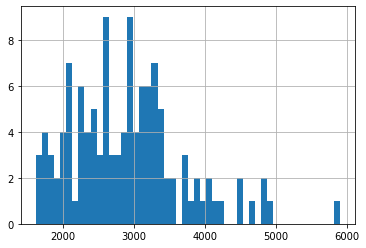

In [0]:
df_pa['price'].hist(bins=50)

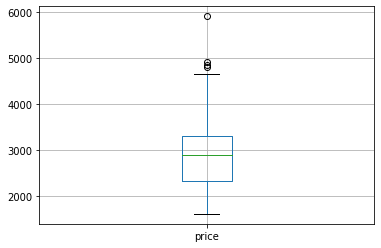

In [0]:
df_pa.boxplot(column='price')

In [0]:
df_pa.columns

Index(['일시', '평균풍속(m/s)', '최대풍속(m/s)', '평균기온(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)',
       '강수량(mm)', '평균현지기압(hPa)', '최고현지기압(hPa)', '최저현지기압(hPa)', '평균해면기압(hPa)',
       '최고해면기압(hPa)', '최저해면기압(hPa)', '평균상대습도(%)', '최소상대습도(%)', '합계일조시간(hr)',
       '합계전천일사량(MJ/㎡)', 'price'],
      dtype='object')

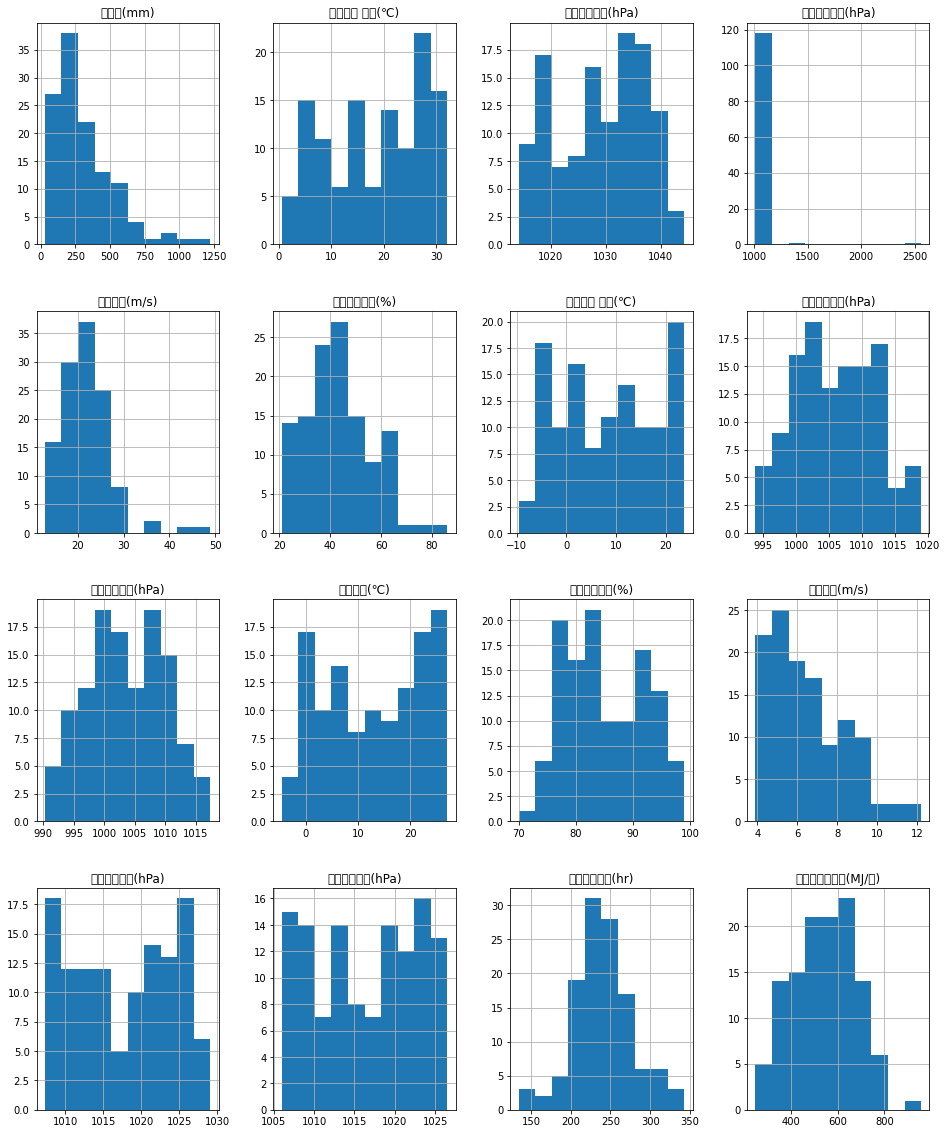

In [0]:
numerical_columns =['평균풍속(m/s)', '최대풍속(m/s)', '평균기온(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)',
       '강수량(mm)', '평균현지기압(hPa)', '최고현지기압(hPa)', '최저현지기압(hPa)', '평균해면기압(hPa)',
       '최고해면기압(hPa)', '최저해면기압(hPa)', '평균상대습도(%)', '최소상대습도(%)', '합계일조시간(hr)',
       '합계전천일사량(MJ/㎡)']
fig=plt.figure(figsize=(16,20))
ax=fig.gca()
df_pa[numerical_columns].hist(ax=ax)
plt.show()

In [0]:
# cols=['평균풍속(m/s)', '최대풍속(m/s)', '평균기온(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)',
#        '강수량(mm)', '평균현지기압(hPa)', '최고현지기압(hPa)', '최저현지기압(hPa)', '평균해면기압(hPa)',
#        '최고해면기압(hPa)', '최저해면기압(hPa)', '평균상대습도(%)', '최소상대습도(%)', '합계일조시간(hr)',
#        '합계전천일사량(MJ/㎡)', 'price','일시']
cols=['평균풍속(m/s)', '최대풍속(m/s)', '평균기온(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)',
       '강수량(mm)','평균상대습도(%)', '최소상대습도(%)', '합계일조시간(hr)',
       '합계전천일사량(MJ/㎡)', 'price','일시']
corr = df_pa[cols].corr(method = 'pearson')

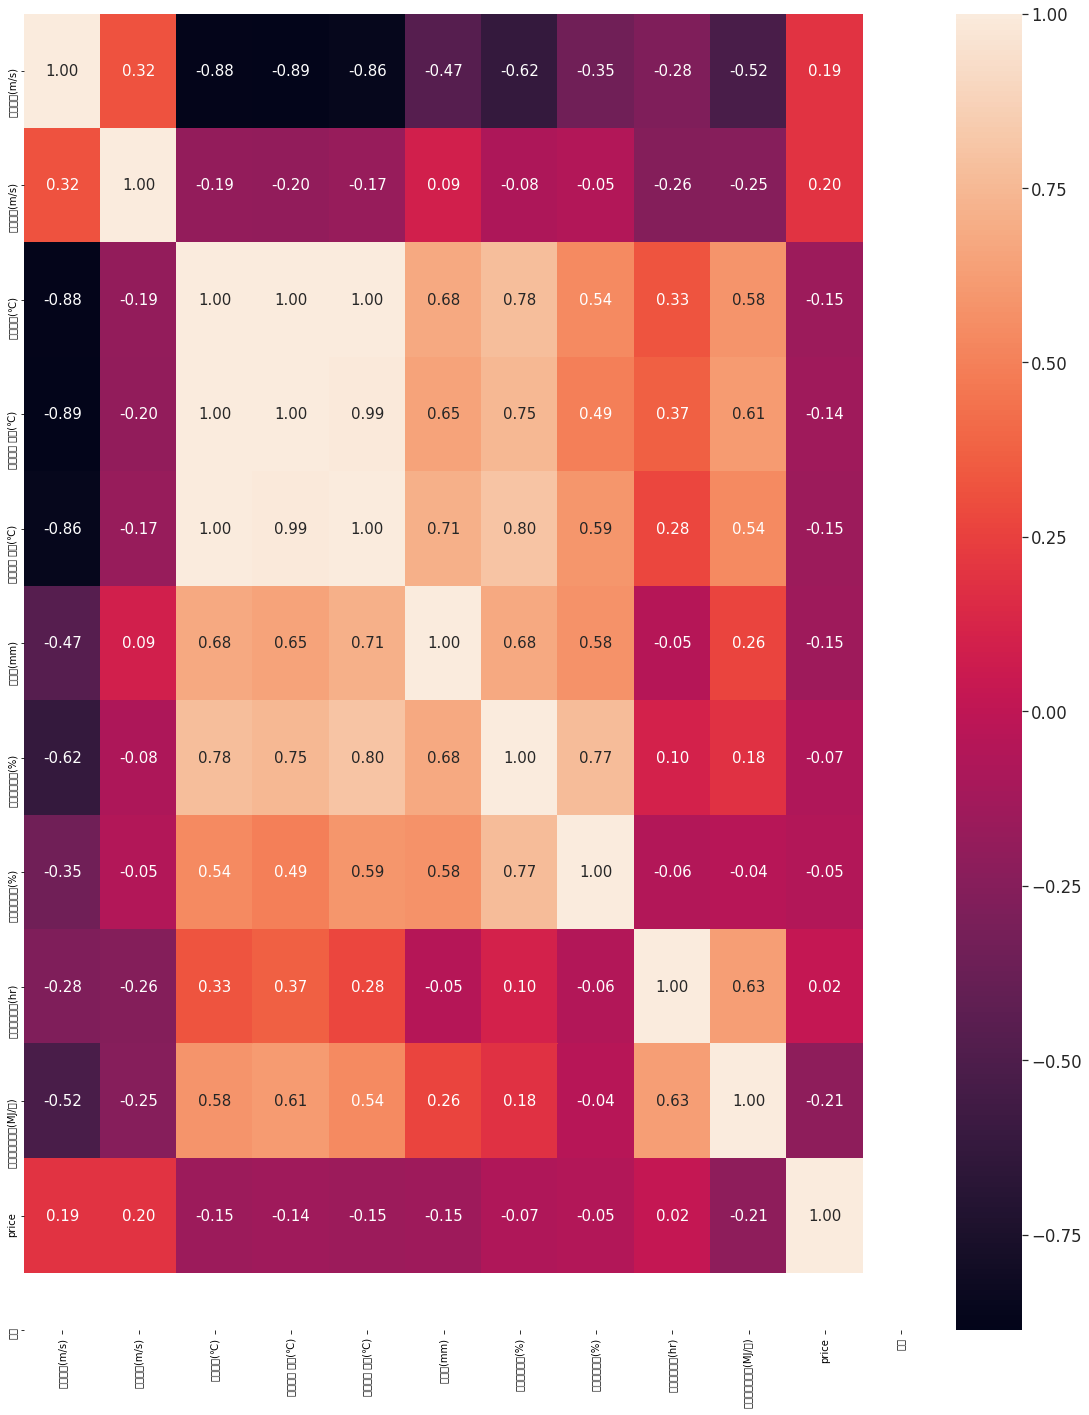

In [0]:
fig= plt.figure(figsize=(16,20))
ax = fig.gca()
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,annot=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols, xticklabels=cols, ax = ax)
plt.tight_layout()
plt.show()

In [0]:
df_pa.to_csv('pa_price.csv')

In [0]:
df=pd.read_csv('/content/drive/My Drive/파예측(전국10년)/data/pa_price.csv').drop(columns='Unnamed: 0')

In [0]:
df.head()

,일시,평균풍속(m/s),최대풍속(m/s),평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm),평균현지기압(hPa),최고현지기압(hPa),최저현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),평균상대습도(%),최소상대습도(%),합계일조시간(hr),합계전천일사량(MJ/㎡),price
0,2010-01-01,10.6,27.8,-1.6,3.6,-6.4,182.9,1023.5,1034.7,1008.7,1026.5,1039.1,1010.8,80.0,44,225.7,336.70,2268.0
1,2010-02-01,7.7,21.3,2.4,7.1,-1.8,157.5,1020.6,1030.9,1007.8,1023.3,1035.0,1008.9,78.0,32,154.2,309.92,2491.0
2,2010-03-01,8.3,28.4,5.4,9.8,1.2,259.3,1020.0,1034.1,999.6,1022.0,1037.0,1002.4,78.0,28,163.6,412.31,2571.0
3,2010-04-01,7.1,24.5,9.7,15.2,4.5,324.8,1018.2,1028.6,1006.8,1019.5,1030.3,1007.6,74.0,28,194.5,574.44,2701.0
4,2010-05-01,5.5,15.8,16.9,22.6,11.5,269.0,1011.4,1021.4,993.0,1012.5,1024.5,994.6,81.0,34,233.6,690.68,3082.0


In [0]:
df['최대풍속(m/s)'].describe()

count    120.000000
mean      21.875000
std        5.342902
min       12.800000
25%       18.825000
50%       21.500000
75%       24.525000
max       49.000000
Name: 최대풍속(m/s), dtype: float64